In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

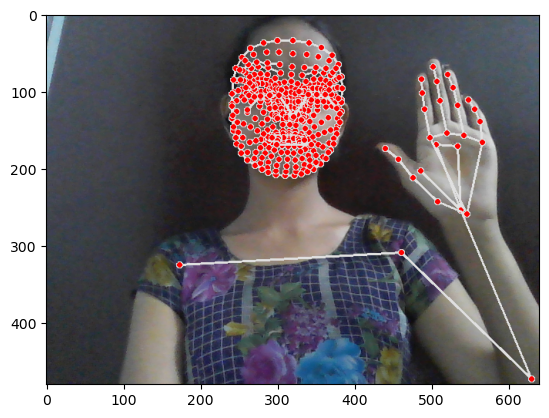

In [12]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmahand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test=extract_keypoints(results)

In [19]:
result_test

array([ 0.50310588,  0.27818364, -0.69669735, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
    np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.53688127,  0.30818415, -0.66768932, ...,  0.        ,
        0.        ,  0.        ])

In [54]:
468*3+33*4+21*3+21*3

1662

In [6]:
import os

# Get the directory path of the current notebook file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

print("Current directory:", notebook_dir)

Current directory: C:\Users\DELL


In [40]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Create the MP_Data folder if it doesn't exist
os.makedirs(DATA_PATH, exist_ok=True)

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','book','education'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # Check if the action folder exists
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    # Get the maximum folder number in the action folder
    dirmax = 0
    if len(os.listdir(action_path)) > 0:
        dirmax = np.max(np.array(os.listdir(action_path)).astype(int))
    
    for sequence in range( no_sequences):
        try:
            # Create the sequence folder if it doesn't exist
            sequence_path = os.path.join(action_path, str(dirmax + sequence))
            if not os.path.exists(sequence_path):
                os.makedirs(sequence_path)
        except:
            pass

print("Folders created successfully.")

Folders created successfully.


In [41]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
               
                np.save(npy_path, keypoints)
          
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [42]:
cap.release()
cv2.destroyAllWindows()

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [44]:
label_map = {label:num for num, label in enumerate(actions)}

In [45]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'book': 3, 'education': 4}

In [46]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [47]:
np.array(sequences).shape

(150, 30, 1662)

In [48]:
np.array(labels).shape

(150,)

In [49]:
X = np.array(sequences)

In [50]:
X.shape

(150, 30, 1662)

In [51]:
y = to_categorical(labels).astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [53]:
y_test.shape

(8, 5)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 8s 135ms/step - loss: 1.9779 - categorical_accuracy: 0.1549
Epoch 2/2000
5/5 [==============================] - 1s 136ms/step - loss: 1.7047 - categorical_accuracy: 0.1408
Epoch 3/2000
5/5 [==============================] - 1s 139ms/step - loss: 1.6550 - categorical_accuracy: 0.1761
Epoch 4/2000
5/5 [==============================] - 1s 160ms/step - loss: 1.5346 - categorical_accuracy: 0.3662
Epoch 5/2000
5/5 [==============================] - 1s 132ms/step - loss: 2.1657 - categorical_accuracy: 0.3662
Epoch 6/2000
5/5 [==============================] - 1s 137ms/step - loss: 2.0368 - categorical_accuracy: 0.3521
Epoch 7/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.2029 - categorical_accuracy: 0.5000
Epoch 8/2000
5/5 [==============================] - 1s 131ms/step - loss: 1.1700 - categorical_accuracy: 0.5070
Epoch 9/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.0135 - categorical_accuracy:

5/5 [==============================] - 1s 123ms/step - loss: 1.2152 - categorical_accuracy: 0.5775
Epoch 74/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.6252 - categorical_accuracy: 0.7676
Epoch 75/2000
5/5 [==============================] - 1s 139ms/step - loss: 0.7689 - categorical_accuracy: 0.6479
Epoch 76/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.6242 - categorical_accuracy: 0.8099
Epoch 77/2000
5/5 [==============================] - 1s 127ms/step - loss: 0.4123 - categorical_accuracy: 0.8944
Epoch 78/2000
5/5 [==============================] - 1s 128ms/step - loss: 0.2401 - categorical_accuracy: 0.9366
Epoch 79/2000
5/5 [==============================] - 1s 119ms/step - loss: 1.6636 - categorical_accuracy: 0.4648
Epoch 80/2000
5/5 [==============================] - 1s 124ms/step - loss: 0.8111 - categorical_accuracy: 0.7746
Epoch 81/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.5673 - categorical_accuracy: 0.81

5/5 [==============================] - 1s 125ms/step - loss: 0.3706 - categorical_accuracy: 0.9225
Epoch 146/2000
5/5 [==============================] - 1s 122ms/step - loss: 0.3081 - categorical_accuracy: 0.8944
Epoch 147/2000
5/5 [==============================] - 1s 127ms/step - loss: 0.1470 - categorical_accuracy: 0.9718
Epoch 148/2000
5/5 [==============================] - 1s 126ms/step - loss: 0.1536 - categorical_accuracy: 0.9648
Epoch 149/2000
5/5 [==============================] - 1s 126ms/step - loss: 0.3464 - categorical_accuracy: 0.9085
Epoch 150/2000
5/5 [==============================] - 1s 126ms/step - loss: 0.2482 - categorical_accuracy: 0.9437
Epoch 151/2000
5/5 [==============================] - 1s 128ms/step - loss: 0.5710 - categorical_accuracy: 0.7606
Epoch 152/2000
5/5 [==============================] - 1s 120ms/step - loss: 0.4147 - categorical_accuracy: 0.8028
Epoch 153/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.2338 - categorical_accura

Epoch 217/2000
5/5 [==============================] - 1s 128ms/step - loss: 0.5930 - categorical_accuracy: 0.7606
Epoch 218/2000
5/5 [==============================] - 1s 124ms/step - loss: 0.6867 - categorical_accuracy: 0.7042
Epoch 219/2000
5/5 [==============================] - 1s 130ms/step - loss: 0.6039 - categorical_accuracy: 0.7535
Epoch 220/2000
5/5 [==============================] - 1s 120ms/step - loss: 0.4811 - categorical_accuracy: 0.8239
Epoch 221/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.4141 - categorical_accuracy: 0.8732
Epoch 222/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.3776 - categorical_accuracy: 0.8803
Epoch 223/2000
5/5 [==============================] - 1s 131ms/step - loss: 0.3418 - categorical_accuracy: 0.8944
Epoch 224/2000
5/5 [==============================] - 1s 127ms/step - loss: 0.2645 - categorical_accuracy: 0.9014
Epoch 225/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.2950 - cat

5/5 [==============================] - 1s 127ms/step - loss: 0.2380 - categorical_accuracy: 0.9155
Epoch 289/2000
5/5 [==============================] - 1s 129ms/step - loss: 0.1777 - categorical_accuracy: 0.9648
Epoch 290/2000
5/5 [==============================] - 1s 129ms/step - loss: 24.6015 - categorical_accuracy: 0.8169
Epoch 291/2000
5/5 [==============================] - 1s 127ms/step - loss: 2.1148 - categorical_accuracy: 0.4014
Epoch 292/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.8779 - categorical_accuracy: 0.6408
Epoch 293/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.8179 - categorical_accuracy: 0.6268
Epoch 294/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.7468 - categorical_accuracy: 0.6620
Epoch 295/2000
5/5 [==============================] - 1s 131ms/step - loss: 0.6803 - categorical_accuracy: 0.7394
Epoch 296/2000
5/5 [==============================] - 1s 133ms/step - loss: 0.6328 - categorical_accur

5/5 [==============================] - 0s 84ms/step - loss: 0.2039 - categorical_accuracy: 0.9507
Epoch 361/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2277 - categorical_accuracy: 0.9296
Epoch 362/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.2055 - categorical_accuracy: 0.9366
Epoch 363/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.2329 - categorical_accuracy: 0.9225
Epoch 364/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2036 - categorical_accuracy: 0.9366
Epoch 365/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.2215 - categorical_accuracy: 0.9155
Epoch 366/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1915 - categorical_accuracy: 0.9225
Epoch 367/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2310 - categorical_accuracy: 0.9155
Epoch 368/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.1917 - categorical_accuracy: 0.943

5/5 [==============================] - 0s 81ms/step - loss: 0.0661 - categorical_accuracy: 0.9859
Epoch 433/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0557 - categorical_accuracy: 0.9859
Epoch 434/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0850 - categorical_accuracy: 0.9718
Epoch 435/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0667 - categorical_accuracy: 0.9789
Epoch 436/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0714 - categorical_accuracy: 0.9789
Epoch 437/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0948 - categorical_accuracy: 0.9577
Epoch 438/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2099 - categorical_accuracy: 0.9296
Epoch 439/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2225 - categorical_accuracy: 0.9014
Epoch 440/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.1827 - categorical_accuracy: 0.922

5/5 [==============================] - 0s 84ms/step - loss: 0.1535 - categorical_accuracy: 0.9718
Epoch 505/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.1097 - categorical_accuracy: 0.9789
Epoch 506/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0780 - categorical_accuracy: 0.9789
Epoch 507/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0817 - categorical_accuracy: 0.9859
Epoch 508/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0738 - categorical_accuracy: 0.9859
Epoch 509/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0655 - categorical_accuracy: 0.9859
Epoch 510/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0711 - categorical_accuracy: 0.9789
Epoch 511/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0586 - categorical_accuracy: 0.9859
Epoch 512/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0592 - categorical_accuracy: 0.985

5/5 [==============================] - 0s 77ms/step - loss: 0.0208 - categorical_accuracy: 0.9930
Epoch 577/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0207 - categorical_accuracy: 0.9930
Epoch 578/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0206 - categorical_accuracy: 0.9930
Epoch 579/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0206 - categorical_accuracy: 0.9930
Epoch 580/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0204 - categorical_accuracy: 0.9930
Epoch 581/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0203 - categorical_accuracy: 0.9930
Epoch 582/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0202 - categorical_accuracy: 0.9930
Epoch 583/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0201 - categorical_accuracy: 0.9930
Epoch 584/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0200 - categorical_accuracy: 0.993

5/5 [==============================] - 0s 79ms/step - loss: 0.0215 - categorical_accuracy: 0.9930
Epoch 649/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0210 - categorical_accuracy: 0.9930
Epoch 650/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0204 - categorical_accuracy: 0.9930
Epoch 651/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0201 - categorical_accuracy: 0.9930
Epoch 652/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0201 - categorical_accuracy: 0.9930
Epoch 653/2000
5/5 [==============================] - 1s 114ms/step - loss: 0.0197 - categorical_accuracy: 0.9930
Epoch 654/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0195 - categorical_accuracy: 0.9930
Epoch 655/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0193 - categorical_accuracy: 0.9930
Epoch 656/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0191 - categorical_accuracy: 0.99

5/5 [==============================] - 0s 82ms/step - loss: 0.0317 - categorical_accuracy: 0.9930
Epoch 721/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0304 - categorical_accuracy: 0.9930
Epoch 722/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0509 - categorical_accuracy: 0.9859
Epoch 723/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0656 - categorical_accuracy: 0.9789
Epoch 724/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0850 - categorical_accuracy: 0.9718
Epoch 725/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0852 - categorical_accuracy: 0.9789
Epoch 726/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.2550 - categorical_accuracy: 0.9225
Epoch 727/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1710 - categorical_accuracy: 0.9437
Epoch 728/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.2816 - categorical_accuracy: 0.901

5/5 [==============================] - 0s 80ms/step - loss: 0.0543 - categorical_accuracy: 0.9859
Epoch 793/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.1487 - categorical_accuracy: 0.9648
Epoch 794/2000
5/5 [==============================] - 0s 80ms/step - loss: 6.8703 - categorical_accuracy: 0.4930
Epoch 795/2000
5/5 [==============================] - 0s 81ms/step - loss: 2.6459 - categorical_accuracy: 0.4930
Epoch 796/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.9936 - categorical_accuracy: 0.7113
Epoch 797/2000
5/5 [==============================] - 0s 100ms/step - loss: 1.0553 - categorical_accuracy: 0.4437
Epoch 798/2000
5/5 [==============================] - 0s 95ms/step - loss: 1.0193 - categorical_accuracy: 0.4859
Epoch 799/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.9244 - categorical_accuracy: 0.6408
Epoch 800/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.8587 - categorical_accuracy: 0.6

5/5 [==============================] - 0s 87ms/step - loss: 0.3487 - categorical_accuracy: 0.8169
Epoch 865/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.3477 - categorical_accuracy: 0.7676
Epoch 866/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.3434 - categorical_accuracy: 0.8239
Epoch 867/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.3412 - categorical_accuracy: 0.8028
Epoch 868/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.3761 - categorical_accuracy: 0.8239
Epoch 869/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.3410 - categorical_accuracy: 0.8028
Epoch 870/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.3409 - categorical_accuracy: 0.7958
Epoch 871/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.3323 - categorical_accuracy: 0.7958
Epoch 872/2000
5/5 [==============================] - 0s 88ms/step - loss: 0.3240 - categorical_accuracy: 0.823

5/5 [==============================] - 0s 90ms/step - loss: 0.2530 - categorical_accuracy: 0.8451
Epoch 937/2000
5/5 [==============================] - 0s 88ms/step - loss: 0.2596 - categorical_accuracy: 0.8592
Epoch 938/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.5699 - categorical_accuracy: 0.8169
Epoch 939/2000
5/5 [==============================] - 0s 101ms/step - loss: 0.3564 - categorical_accuracy: 0.8239
Epoch 940/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.3182 - categorical_accuracy: 0.8380
Epoch 941/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.3204 - categorical_accuracy: 0.8310
Epoch 942/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.3149 - categorical_accuracy: 0.8169
Epoch 943/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.3047 - categorical_accuracy: 0.8380
Epoch 944/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.2946 - categorical_accuracy: 0.83

5/5 [==============================] - 0s 86ms/step - loss: 0.2143 - categorical_accuracy: 0.8521
Epoch 1009/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.2351 - categorical_accuracy: 0.8451
Epoch 1010/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.2019 - categorical_accuracy: 0.9014
Epoch 1011/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2533 - categorical_accuracy: 0.8662
Epoch 1012/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2409 - categorical_accuracy: 0.8451
Epoch 1013/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.8917 - categorical_accuracy: 0.7676
Epoch 1014/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.6828 - categorical_accuracy: 0.7676
Epoch 1015/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.5771 - categorical_accuracy: 0.7465
Epoch 1016/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.5292 - categorical_accurac

Epoch 1080/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.2154 - categorical_accuracy: 0.8310
Epoch 1081/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.2113 - categorical_accuracy: 0.8451
Epoch 1082/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.2155 - categorical_accuracy: 0.8592
Epoch 1083/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2103 - categorical_accuracy: 0.8662
Epoch 1084/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2128 - categorical_accuracy: 0.8380
Epoch 1085/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2104 - categorical_accuracy: 0.8451
Epoch 1086/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2083 - categorical_accuracy: 0.8662
Epoch 1087/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2120 - categorical_accuracy: 0.8451
Epoch 1088/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2089 - cat

5/5 [==============================] - 0s 80ms/step - loss: 0.2344 - categorical_accuracy: 0.8521
Epoch 1152/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.2328 - categorical_accuracy: 0.8521
Epoch 1153/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.2297 - categorical_accuracy: 0.8521
Epoch 1154/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2281 - categorical_accuracy: 0.8521
Epoch 1155/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.2285 - categorical_accuracy: 0.8521
Epoch 1156/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2270 - categorical_accuracy: 0.8521
Epoch 1157/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.2297 - categorical_accuracy: 0.8592
Epoch 1158/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.2257 - categorical_accuracy: 0.8451
Epoch 1159/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.2251 - categorical_accurac

Epoch 1223/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2050 - categorical_accuracy: 0.8662
Epoch 1224/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1992 - categorical_accuracy: 0.8451
Epoch 1225/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.2029 - categorical_accuracy: 0.8239
Epoch 1226/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.1981 - categorical_accuracy: 0.8662
Epoch 1227/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.2002 - categorical_accuracy: 0.8662
Epoch 1228/2000
5/5 [==============================] - 0s 90ms/step - loss: 0.2020 - categorical_accuracy: 0.8592
Epoch 1229/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.1989 - categorical_accuracy: 0.8451
Epoch 1230/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.2067 - categorical_accuracy: 0.8662
Epoch 1231/2000
5/5 [==============================] - 0s 88ms/step - loss: 0.2041 - cat

5/5 [==============================] - 0s 77ms/step - loss: 0.1985 - categorical_accuracy: 0.8803
Epoch 1295/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1964 - categorical_accuracy: 0.8732
Epoch 1296/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.2025 - categorical_accuracy: 0.8662
Epoch 1297/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.2041 - categorical_accuracy: 0.8451
Epoch 1298/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.1959 - categorical_accuracy: 0.8451
Epoch 1299/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.1922 - categorical_accuracy: 0.8732
Epoch 1300/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.1925 - categorical_accuracy: 0.8451
Epoch 1301/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.1941 - categorical_accuracy: 0.8380
Epoch 1302/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.1929 - categorical_accurac

5/5 [==============================] - 0s 89ms/step - loss: 0.0491 - categorical_accuracy: 0.9930
Epoch 1366/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0544 - categorical_accuracy: 0.9789
Epoch 1367/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0425 - categorical_accuracy: 0.9930
Epoch 1368/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0428 - categorical_accuracy: 0.9930
Epoch 1369/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0386 - categorical_accuracy: 0.9930
Epoch 1370/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0364 - categorical_accuracy: 0.9930
Epoch 1371/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0345 - categorical_accuracy: 0.9930
Epoch 1372/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0456 - categorical_accuracy: 0.9789
Epoch 1373/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0638 - categorical_accurac

5/5 [==============================] - 0s 79ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1438/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 1439/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1440/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1441/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1442/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1443/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 1444/2000
5/5 [==============================] - 0s 91ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1445/2000
5/5 [==============================] - 1s 112ms/step - loss: 0.0021 - categorical_accura

Epoch 1509/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.0250 - categorical_accuracy: 0.9930
Epoch 1510/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0148 - categorical_accuracy: 1.0000
Epoch 1511/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0170 - categorical_accuracy: 0.9930
Epoch 1512/2000
5/5 [==============================] - 0s 101ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 1513/2000
5/5 [==============================] - 1s 117ms/step - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 1514/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0142 - categorical_accuracy: 0.9930
Epoch 1515/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0155 - categorical_accuracy: 0.9930
Epoch 1516/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0134 - categorical_accuracy: 0.9930
Epoch 1517/2000
5/5 [==============================] - 1s 111ms/step - loss: 0.0155 - 

5/5 [==============================] - 0s 89ms/step - loss: 9.4047e-04 - categorical_accuracy: 1.0000
Epoch 1581/2000
5/5 [==============================] - 0s 81ms/step - loss: 8.8670e-04 - categorical_accuracy: 1.0000
Epoch 1582/2000
5/5 [==============================] - 0s 82ms/step - loss: 8.7207e-04 - categorical_accuracy: 1.0000
Epoch 1583/2000
5/5 [==============================] - 0s 81ms/step - loss: 8.6957e-04 - categorical_accuracy: 1.0000
Epoch 1584/2000
5/5 [==============================] - 0s 83ms/step - loss: 8.4460e-04 - categorical_accuracy: 1.0000
Epoch 1585/2000
5/5 [==============================] - 0s 85ms/step - loss: 8.4441e-04 - categorical_accuracy: 1.0000
Epoch 1586/2000
5/5 [==============================] - 0s 82ms/step - loss: 8.4459e-04 - categorical_accuracy: 1.0000
Epoch 1587/2000
5/5 [==============================] - 0s 80ms/step - loss: 7.9777e-04 - categorical_accuracy: 1.0000
Epoch 1588/2000
5/5 [==============================] - 0s 82ms/step - lo

5/5 [==============================] - 0s 81ms/step - loss: 2.9063e-04 - categorical_accuracy: 1.0000
Epoch 1650/2000
5/5 [==============================] - 0s 83ms/step - loss: 2.8549e-04 - categorical_accuracy: 1.0000
Epoch 1651/2000
5/5 [==============================] - 0s 84ms/step - loss: 2.8379e-04 - categorical_accuracy: 1.0000
Epoch 1652/2000
5/5 [==============================] - 0s 80ms/step - loss: 2.7935e-04 - categorical_accuracy: 1.0000
Epoch 1653/2000
5/5 [==============================] - 0s 81ms/step - loss: 2.7642e-04 - categorical_accuracy: 1.0000
Epoch 1654/2000
5/5 [==============================] - 0s 85ms/step - loss: 2.7306e-04 - categorical_accuracy: 1.0000
Epoch 1655/2000
5/5 [==============================] - 0s 84ms/step - loss: 2.7215e-04 - categorical_accuracy: 1.0000
Epoch 1656/2000
5/5 [==============================] - 0s 88ms/step - loss: 2.6849e-04 - categorical_accuracy: 1.0000
Epoch 1657/2000
5/5 [==============================] - 0s 96ms/step - lo

5/5 [==============================] - 0s 80ms/step - loss: 1.3993e-04 - categorical_accuracy: 1.0000
Epoch 1719/2000
5/5 [==============================] - 0s 81ms/step - loss: 1.3758e-04 - categorical_accuracy: 1.0000
Epoch 1720/2000
5/5 [==============================] - 0s 80ms/step - loss: 1.3600e-04 - categorical_accuracy: 1.0000
Epoch 1721/2000
5/5 [==============================] - 0s 85ms/step - loss: 1.3405e-04 - categorical_accuracy: 1.0000
Epoch 1722/2000
5/5 [==============================] - 0s 80ms/step - loss: 1.3222e-04 - categorical_accuracy: 1.0000
Epoch 1723/2000
5/5 [==============================] - 0s 75ms/step - loss: 1.3076e-04 - categorical_accuracy: 1.0000
Epoch 1724/2000
5/5 [==============================] - 0s 77ms/step - loss: 1.2931e-04 - categorical_accuracy: 1.0000
Epoch 1725/2000
5/5 [==============================] - 0s 82ms/step - loss: 1.2817e-04 - categorical_accuracy: 1.0000
Epoch 1726/2000
5/5 [==============================] - 0s 80ms/step - lo

5/5 [==============================] - 0s 97ms/step - loss: 7.6376e-05 - categorical_accuracy: 1.0000
Epoch 1788/2000
5/5 [==============================] - 0s 91ms/step - loss: 7.5869e-05 - categorical_accuracy: 1.0000
Epoch 1789/2000
5/5 [==============================] - 0s 91ms/step - loss: 7.5433e-05 - categorical_accuracy: 1.0000
Epoch 1790/2000
5/5 [==============================] - 0s 92ms/step - loss: 7.4780e-05 - categorical_accuracy: 1.0000
Epoch 1791/2000
5/5 [==============================] - 1s 113ms/step - loss: 7.3974e-05 - categorical_accuracy: 1.0000
Epoch 1792/2000
5/5 [==============================] - 1s 122ms/step - loss: 7.3752e-05 - categorical_accuracy: 1.0000
Epoch 1793/2000
5/5 [==============================] - 1s 121ms/step - loss: 7.3250e-05 - categorical_accuracy: 1.0000
Epoch 1794/2000
5/5 [==============================] - 1s 171ms/step - loss: 7.2448e-05 - categorical_accuracy: 1.0000
Epoch 1795/2000
5/5 [==============================] - 1s 105ms/step

5/5 [==============================] - 0s 85ms/step - loss: 5.1681e-05 - categorical_accuracy: 1.0000
Epoch 1857/2000
5/5 [==============================] - 0s 81ms/step - loss: 5.0690e-05 - categorical_accuracy: 1.0000
Epoch 1858/2000
5/5 [==============================] - 0s 82ms/step - loss: 5.0166e-05 - categorical_accuracy: 1.0000
Epoch 1859/2000
5/5 [==============================] - 0s 79ms/step - loss: 4.9868e-05 - categorical_accuracy: 1.0000
Epoch 1860/2000
5/5 [==============================] - 0s 83ms/step - loss: 4.9416e-05 - categorical_accuracy: 1.0000
Epoch 1861/2000
5/5 [==============================] - 0s 80ms/step - loss: 4.8916e-05 - categorical_accuracy: 1.0000
Epoch 1862/2000
5/5 [==============================] - 0s 82ms/step - loss: 4.8541e-05 - categorical_accuracy: 1.0000
Epoch 1863/2000
5/5 [==============================] - 0s 81ms/step - loss: 4.8244e-05 - categorical_accuracy: 1.0000
Epoch 1864/2000
5/5 [==============================] - 0s 86ms/step - lo

5/5 [==============================] - 0s 83ms/step - loss: 0.1822 - categorical_accuracy: 0.9507
Epoch 1927/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.1782 - categorical_accuracy: 0.9507
Epoch 1928/2000
5/5 [==============================] - 0s 88ms/step - loss: 0.1697 - categorical_accuracy: 0.9507
Epoch 1929/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.2021 - categorical_accuracy: 0.9437
Epoch 1930/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.2304 - categorical_accuracy: 0.9225
Epoch 1931/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.2233 - categorical_accuracy: 0.9296
Epoch 1932/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.1389 - categorical_accuracy: 0.9648
Epoch 1933/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.1723 - categorical_accuracy: 0.9437
Epoch 1934/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.1410 - categorical_accurac

5/5 [==============================] - 0s 82ms/step - loss: 0.0177 - categorical_accuracy: 0.9930
Epoch 1999/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0110 - categorical_accuracy: 0.9930
Epoch 2000/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0106 - categorical_accuracy: 1.0000


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-tr

In [60]:
res = model.predict(X_test)

In [61]:
actions[np.argmax(res[3])]

'thanks'

In [62]:
actions[np.argmax(y_test[3])]

'thanks'

In [63]:
model.save('action.h5')

In [64]:
model.load_weights('action.h5')

In [65]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [66]:
yhat = model.predict(X_test)

In [67]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [68]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[5, 1],
        [0, 2]],

       [[6, 0],
        [1, 1]],

       [[6, 0],
        [0, 2]],

       [[7, 0],
        [0, 1]]], dtype=int64)

In [69]:
accuracy_score(ytrue, yhat)

0.875

In [73]:
from scipy import stats

In [78]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if num < len(colors):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

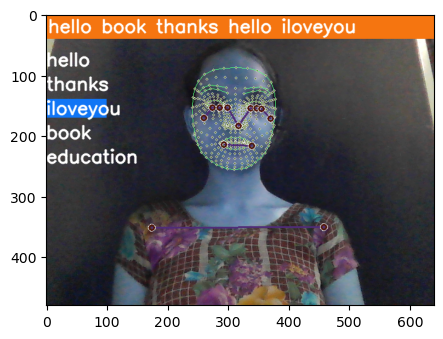

In [91]:
plt.figure(figsize=(5,5))
plt.imshow(prob_viz(res, actions, image, colors))

In [77]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        #if res[np.argmax(res)] > threshold: 
            if np.all(res[np.argmax(res)] > threshold): 
                    
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
                image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
            cv2.imshow('OpenCV Feed', image)
            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

In [157]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)

In [76]:
model.predict(np.expand_dims(X_test[0],axis=0))

array([[0.19261837, 0.29829377, 0.5090879 ]], dtype=float32)

In [86]:

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

In [158]:
print(res.shape)

(5, 3)


In [159]:
print(type(res))

<class 'numpy.ndarray'>


In [160]:
res

array([[0.28619716, 0.41318828, 0.30061454],
       [0.3023155 , 0.3714788 , 0.32620567],
       [0.24065048, 0.4926189 , 0.26673058],
       [0.28714445, 0.39602166, 0.31683382],
       [0.31616774, 0.34951368, 0.33431855]], dtype=float32)

In [161]:
res = np.array(res, dtype=np.float64)

In [162]:
res

array([[0.28619716, 0.41318828, 0.30061454],
       [0.3023155 , 0.3714788 , 0.32620567],
       [0.24065048, 0.49261889, 0.26673058],
       [0.28714445, 0.39602166, 0.31683382],
       [0.31616774, 0.34951368, 0.33431855]])

In [88]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.So

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOut

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class '

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class 'mediapipe.python.solution_base.SolutionOutputs'>
book
<class

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution